/Users/lukas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/lukas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='quantity'>

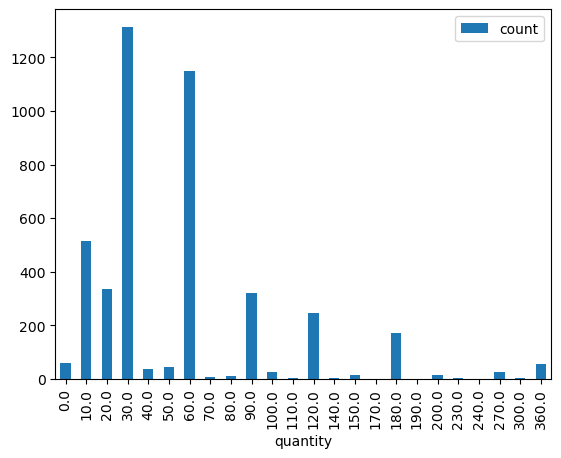

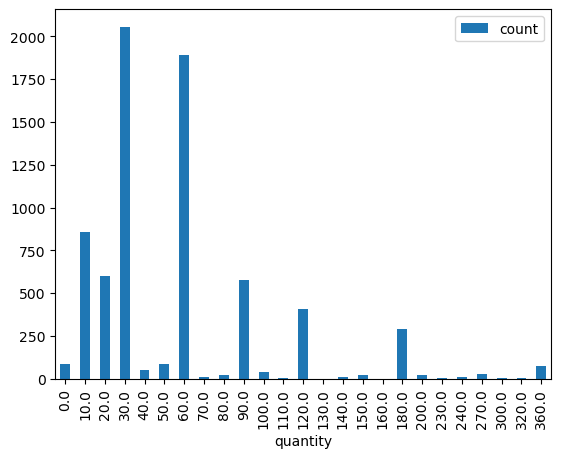

In [9]:
import psycopg2
import pandas as pd

conn = psycopg2.connect("host=localhost dbname=ohdsi user=postgres password=postgres")

menMetmorfin = """
SELECT p.gender_concept_id, d.quantity, COUNT(*)
FROM drug_exposure d
JOIN concept c on d.drug_concept_id = c.concept_id
JOIN person p on d.person_id = p.person_id
WHERE d.days_supply = 30 AND d.drug_concept_id = 40164946 AND p.gender_concept_id = 8507
GROUP BY p.gender_concept_id, d.quantity
ORDER BY d.quantity;
"""

df = pd.read_sql(menMetmorfin, conn)

df.plot(x = 'quantity', y = 'count', kind = 'bar')

womenMetmorfin = """
SELECT p.gender_concept_id, d.quantity, COUNT(*)
FROM drug_exposure d
JOIN concept c on d.drug_concept_id = c.concept_id
JOIN person p on d.person_id = p.person_id
WHERE d.days_supply = 30 AND d.drug_concept_id = 40164946 AND p.gender_concept_id = 8532
GROUP BY p.gender_concept_id, d.quantity
ORDER BY d.quantity;
"""

df = pd.read_sql(womenMetmorfin, conn)

df.plot(x = 'quantity', y = 'count', kind = 'bar')